In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import kerastuner as kt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
import tensorflow as tf
from keras.initializers import RandomUniform
from keras.initializers import GlorotNormal
from keras.optimizers import Adam
from keras.layers import  Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model 
from keras.models import load_model

C:\Users\barrc\AppData\Local\Temp\ipykernel_10628\45070964.py:26: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
df=pd.read_csv("concrete_data-1.csv")

In [3]:
# Obtener nombres de las columnas
colnames = df.columns

In [4]:
# Convertir DataFrame a matriz numpy
df = df.to_numpy()

# Normalizando los datos
scaler = MinMaxScaler()
model_sc = scaler.fit(df)
df = model_sc.transform(df)

# Barajar las filas
nrow = df.shape[0]
ncol = df.shape[1]
idx = list(range(0, nrow))
np.random.seed(seed=2343)
np.random.shuffle(idx)
df = df[idx, :]

In [5]:
# Dividir en X (atributos independientes) y y (atributo dependiente)
X = df[:, :-1]
y = df[:, -1]

In [6]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)  # 20% del conjunto de entrenamiento para validación

# Imprimir las formas de los conjuntos de entrenamiento, validación y prueba para verificar
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (576, 8)
Shape of X_val: (145, 8)
Shape of X_test: (309, 8)
Shape of y_train: (576,)
Shape of y_val: (145,)
Shape of y_test: (309,)


In [7]:
def evaluate_model(model, X_train, X_test, y_train, y_test, X_val=None, y_val=None, cv=5):
    # Realizar validación cruzada en el conjunto de entrenamiento
    cv_scores_mse = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_scores_mae = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    cv_scores_mape = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_percentage_error')
    cv_scores_msle = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_log_error')
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

    # Convertir los puntajes a valores positivos
    cv_scores_mse = -cv_scores_mse
    cv_scores_mae = -cv_scores_mae
    cv_scores_mape = -cv_scores_mape
    cv_scores_msle = -cv_scores_msle

    # Calcular la media y la desviación estándar de los puntajes de validación cruzada para cada métrica
    cv_mean_mse = np.mean(cv_scores_mse)
    cv_mean_mae = np.mean(cv_scores_mae)
    cv_mean_mape = np.mean(cv_scores_mape)
    cv_mean_msle = np.mean(cv_scores_msle)
    cv_mean_r2 = np.mean(cv_scores_r2)

    cv_std_mse = np.std(cv_scores_mse)
    cv_std_mae = np.std(cv_scores_mae)
    cv_std_mape = np.std(cv_scores_mape)
    cv_std_msle = np.std(cv_scores_msle)
    cv_std_r2 = np.std(cv_scores_r2)

    # Imprimir los resultados de validación cruzada para cada métrica
    print("\nResultados de validación cruzada:")
    print("Mean Squared Error (MSE) - Validación cruzada:", cv_mean_mse, "+/-", cv_std_mse)
    print("Mean Absolute Error (MAE) - Validación cruzada:", cv_mean_mae, "+/-", cv_std_mae)
    print("Mean Absolute Percentage Error (MAPE) - Validación cruzada:", cv_mean_mape, "+/-", cv_std_mape)
    print("Mean Squared Logarithmic Error (MSLE) - Validación cruzada:", cv_mean_msle, "+/-", cv_std_msle)
    print("R^2 Score - Validación cruzada:", cv_mean_r2, "+/-", cv_std_r2)

    # Entrenar el modelo con todo el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Predecir los valores de salida para el conjunto de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular las métricas de evaluación para el conjunto de entrenamiento y prueba
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    train_msle = mean_squared_log_error(y_train, y_train_pred)
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    # Imprimir las métricas de evaluación para el conjunto de entrenamiento y prueba
    print("\nMétricas del modelo:")
    print("Mean Squared Error (MSE) - Conjunto de Entrenamiento:", train_mse)
    print("Mean Squared Error (MSE) - Conjunto de Prueba:", test_mse)
    print("R^2 Score - Conjunto de Entrenamiento:", train_r2)
    print("R^2 Score - Conjunto de Prueba:", test_r2)
    print("Mean Absolute Error (MAE) - Conjunto de Entrenamiento:", train_mae)
    print("Mean Absolute Error (MAE) - Conjunto de Prueba:", test_mae)
    print("Mean Absolute Percentage Error (MAPE) - Conjunto de Entrenamiento:", train_mape)
    print("Mean Absolute Percentage Error (MAPE) - Conjunto de Prueba:", test_mape)
    print("Mean Squared Logarithmic Error (MSLE) - Conjunto de Entrenamiento:", train_msle)
    print("Mean Squared Logarithmic Error (MSLE) - Conjunto de Prueba:", test_msle)
    print("Raíz del Error Cuadrático Medio (RMSE) - Conjunto de Entrenamiento:", train_rmse)
    print("Raíz del Error Cuadrático Medio (RMSE) - Conjunto de Prueba:", test_rmse)

    # Graficar comparación entre los valores reales y las predicciones
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, y_train_pred, color='blue', label='Entrenamiento')
    plt.scatter(y_test, y_test_pred, color='red', label='Prueba')
    if X_val is not None and y_val is not None:
        y_val_pred = model.predict(X_val)
        plt.scatter(y_val, y_val_pred, color='green', label='Validación')
    plt.plot([min(y.min(), y_train_pred.min()), max(y.max(), y_train_pred.max())], [min(y.min(), y_train_pred.min()), max(y.max(), y_train_pred.max())], color='k', lw=2, linestyle='--', label='Relación ideal')
    plt.xlabel('Valores reales')
    plt.ylabel('Predicciones')
    plt.title('Comparación entre los valores reales y las predicciones')
    plt.legend()
    plt.show()

    # Histograma de errores
    plt.figure(figsize=(10, 6))
    train_errors = y_train_pred - y_train
    test_errors = y_test_pred - y_test
    if X_val is not None and y_val is not None:
        val_errors = y_val_pred - y_val
        sns.histplot(val_errors, color='green', kde=True, label='Validación')
    sns.histplot(train_errors, color='blue', kde=True, label='Entrenamiento')
    sns.histplot(test_errors, color='red', kde=True, label='Prueba')
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de errores')
    plt.legend()
    plt.show()

    # Curva de aprendizaje
    def plot_learning_curve(model, X, y, title, cv=5):
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
        train_scores_mean = -np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="blue")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="orange")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Entrenamiento")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Prueba")
        plt.xlabel("Tamaño del conjunto de entrenamiento")
        plt.ylabel("Mean Squared Error")
        plt.title(title)
        plt.legend(loc="best")
        plt.grid()
        plt.show()

    plot_learning_curve(model, X_train, y_train, "Curva de aprendizaje", cv=cv)


--------------------------------------------------------------------------------------------

### Linear Regression.

C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Resultados de validación cruzada:
Mean Squared Error (MSE) - Validación cruzada: 0.017335655500098496 +/- 0.0030956412779332486
Mean Absolute Error (MAE) - Validación cruzada: 0.10404032744861962 +/- 0.00866537936765095
Mean Absolute Percentage Error (MAPE) - Validación cruzada: 805643959517.0443 +/- 1611287919033.3494
Mean Squared Logarithmic Error (MSLE) - Validación cruzada: 0.00816058733523167 +/- 0.0013939784112851782
R^2 Score - Validación cruzada: 0.6025699801353683 +/- 0.07629348403621891

Métricas del modelo:
Mean Squared Error (MSE) - Conjunto de Entrenamiento: 0.016325921022296384
Mean Squared Error (MSE) - Conjunto de Prueba: 0.017363162657800555
R^2 Score - Conjunto de Entrenamiento: 0.6332197030705937
R^2 Score - Conjunto de Prueba: 0.6009281637606387
Mean Absolute Error (MAE) - Conjunto de Entrenamiento: 0.10172329297464604
Mean Absolute Error (MAE) - Conjunto de Prueba: 0.10250711739549663
Mean Absolute Percentage Error (MAPE) - Conjunto de Entrenamiento: 724964291301.

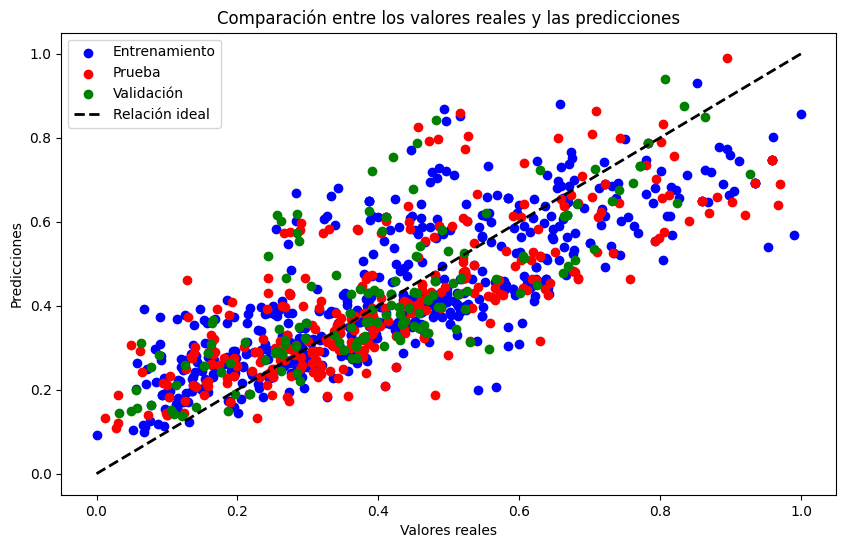

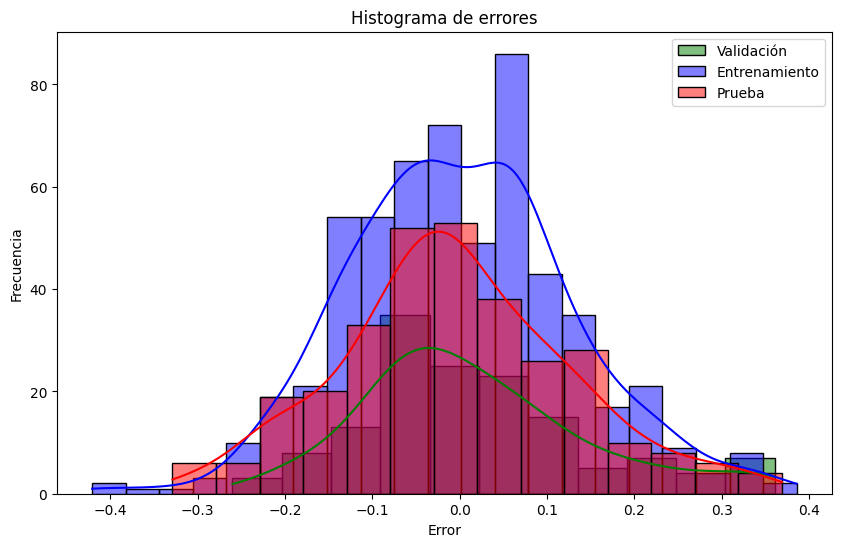

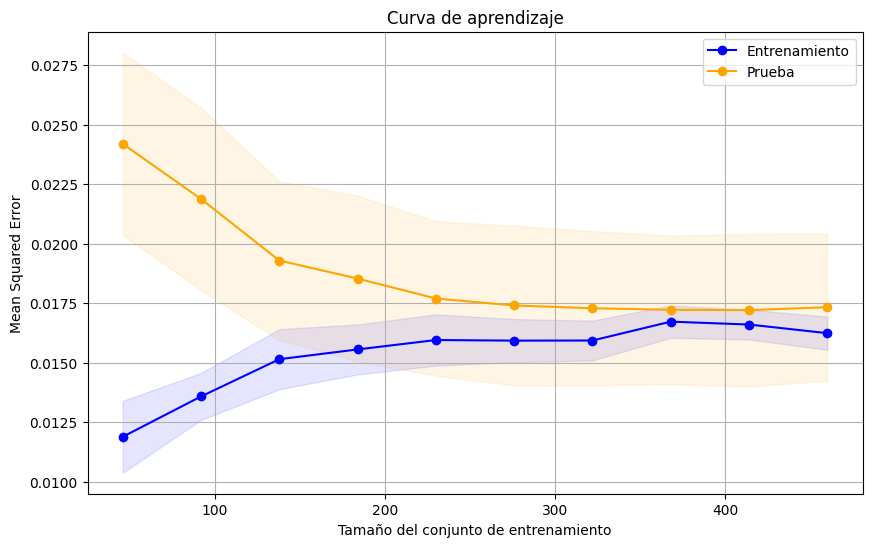

In [8]:
# Crear el modelo
linear_reg = LinearRegression()

# Evaluar el modelo
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, X_val, y_val)

--------------------------------------------------------------------------------------------

### Random Forest Regressor.


Resultados de validación cruzada:
Mean Squared Error (MSE) - Validación cruzada: 0.005176508981166355 +/- 0.0009712578607871486
Mean Absolute Error (MAE) - Validación cruzada: 0.05179185123251673 +/- 0.005334468396300928
Mean Absolute Percentage Error (MAPE) - Validación cruzada: 538526315065.52167 +/- 1077052630130.7047
Mean Squared Logarithmic Error (MSLE) - Validación cruzada: 0.0024278630255364165 +/- 0.0005882183274479272
R^2 Score - Validación cruzada: 0.8831698190740902 +/- 0.02620182696644183

Métricas del modelo:
Mean Squared Error (MSE) - Conjunto de Entrenamiento: 0.0006874651031217814
Mean Squared Error (MSE) - Conjunto de Prueba: 0.0047464963864092815
R^2 Score - Conjunto de Entrenamiento: 0.9845553182385698
R^2 Score - Conjunto de Prueba: 0.8909073729274279
Mean Absolute Error (MAE) - Conjunto de Entrenamiento: 0.0185509546324681
Mean Absolute Error (MAE) - Conjunto de Prueba: 0.04908453608077211
Mean Absolute Percentage Error (MAPE) - Conjunto de Entrenamiento: 22997467

C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


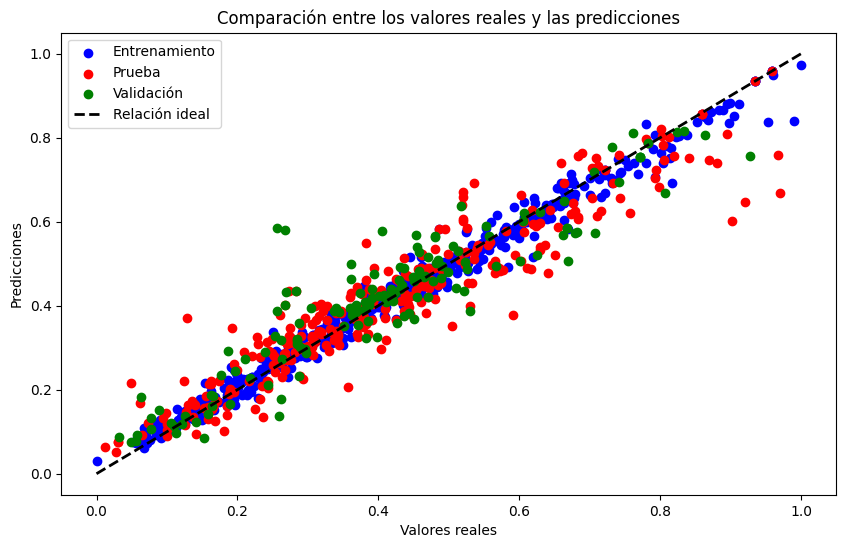

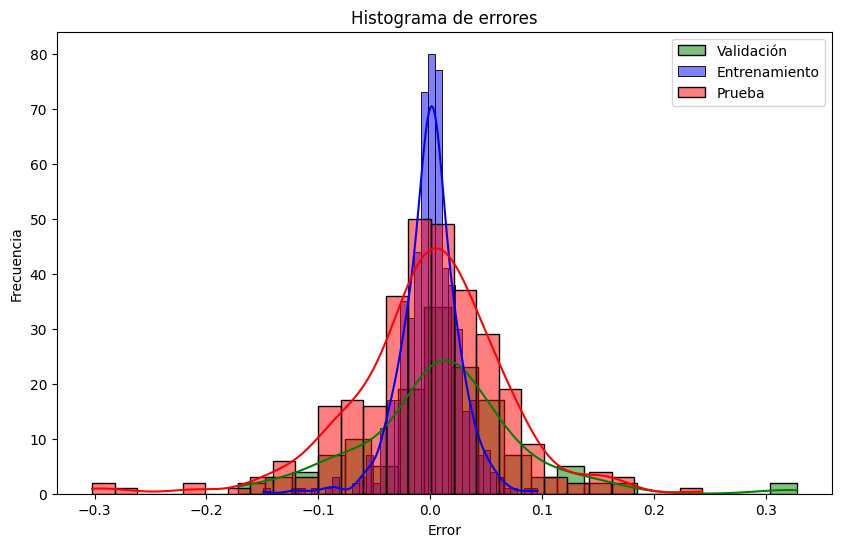

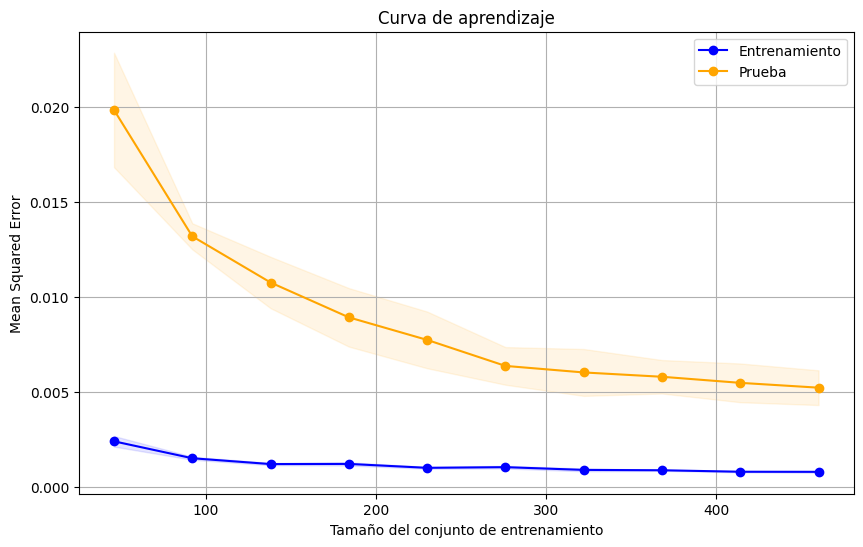

In [9]:
# Crear el modelo
random_forest = RandomForestRegressor()

# Evaluar el modelo
evaluate_model(random_forest, X_train, X_test, y_train, y_test, X_val, y_val)

--------------------------------------------------------------------------------------------

### Gradient Boosting Regressor.


Resultados de validación cruzada:
Mean Squared Error (MSE) - Validación cruzada: 0.0047859045359745795 +/- 0.0008573137127328599
Mean Absolute Error (MAE) - Validación cruzada: 0.051539592793435916 +/- 0.004555902676481493
Mean Absolute Percentage Error (MAPE) - Validación cruzada: 594943866406.8309 +/- 1189887732813.3313
Mean Squared Logarithmic Error (MSLE) - Validación cruzada: 0.0022176028902435936 +/- 0.0003606507104997954
R^2 Score - Validación cruzada: 0.8911430996149609 +/- 0.01910664406207122

Métricas del modelo:
Mean Squared Error (MSE) - Conjunto de Entrenamiento: 0.001819364717999152
Mean Squared Error (MSE) - Conjunto de Prueba: 0.004585740138399381
R^2 Score - Conjunto de Entrenamiento: 0.9591259120646688
R^2 Score - Conjunto de Prueba: 0.8946021658833322
Mean Absolute Error (MAE) - Conjunto de Entrenamiento: 0.032787432552644394
Mean Absolute Error (MAE) - Conjunto de Prueba: 0.04938616500055675
Mean Absolute Percentage Error (MAPE) - Conjunto de Entrenamiento: 3283628

C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


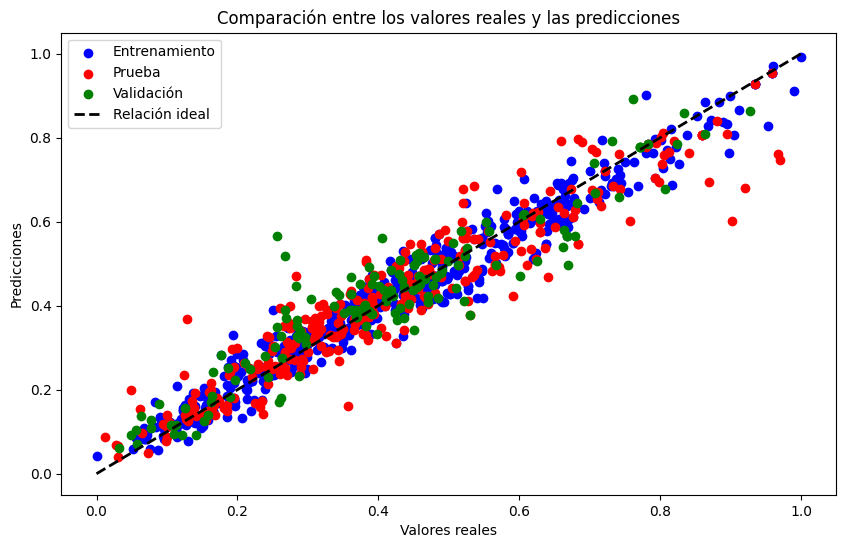

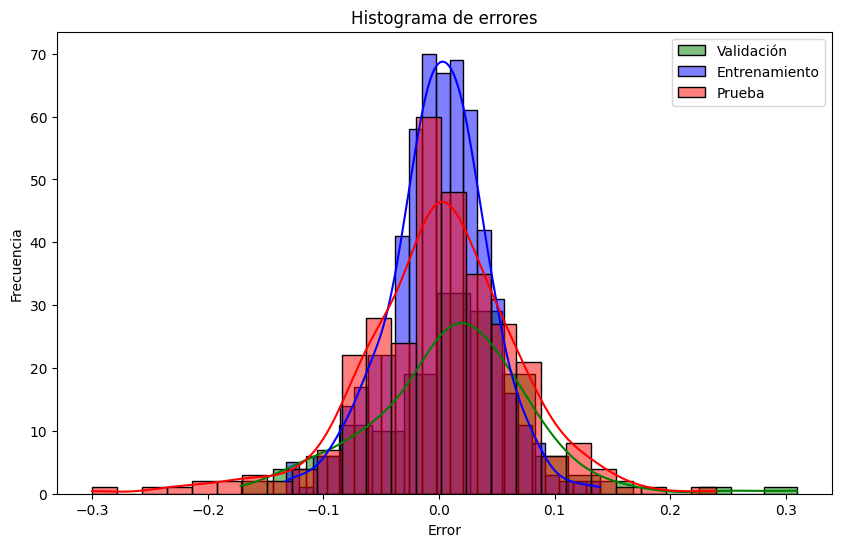

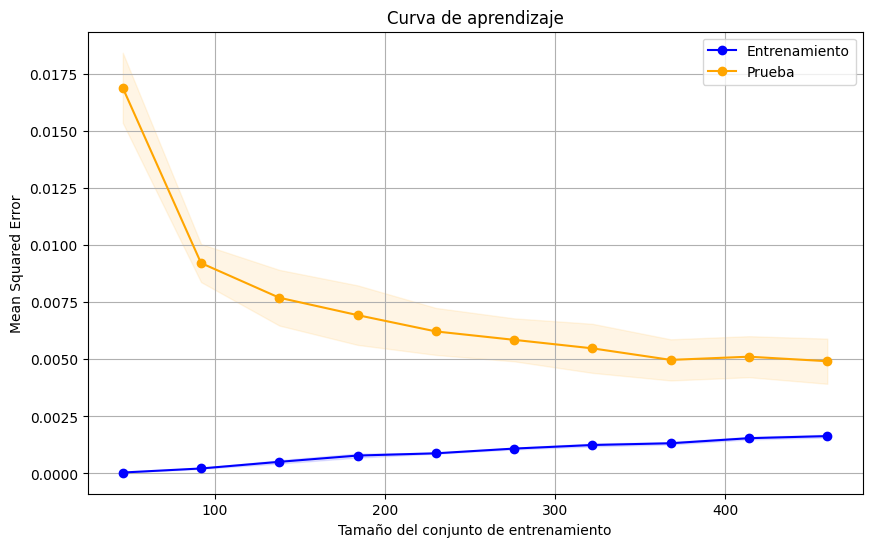

In [10]:
# Crear el modelo
gradient_boosting = GradientBoostingRegressor()

# Evaluar el modelo
evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test, X_val, y_val)

--------------------------------------------------------------------------------------------

### Support Vector Regressor.


Resultados de validación cruzada:
Mean Squared Error (MSE) - Validación cruzada: 0.009226552197923475 +/- 0.0017578231335918025
Mean Absolute Error (MAE) - Validación cruzada: 0.07580409031659469 +/- 0.006876722584665938
Mean Absolute Percentage Error (MAPE) - Validación cruzada: 959205950310.7561 +/- 1918411900620.995
Mean Squared Logarithmic Error (MSLE) - Validación cruzada: 0.004432223719294802 +/- 0.0006840886758416459
R^2 Score - Validación cruzada: 0.7922325388395175 +/- 0.018604800690723393

Métricas del modelo:
Mean Squared Error (MSE) - Conjunto de Entrenamiento: 0.006068502515511296
Mean Squared Error (MSE) - Conjunto de Prueba: 0.00846775601964761
R^2 Score - Conjunto de Entrenamiento: 0.8636642213620728
R^2 Score - Conjunto de Prueba: 0.8053786046823952
Mean Absolute Error (MAE) - Conjunto de Entrenamiento: 0.06550320231902779
Mean Absolute Error (MAE) - Conjunto de Prueba: 0.0715585335603449
Mean Absolute Percentage Error (MAPE) - Conjunto de Entrenamiento: 782571653238.

C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\barrc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


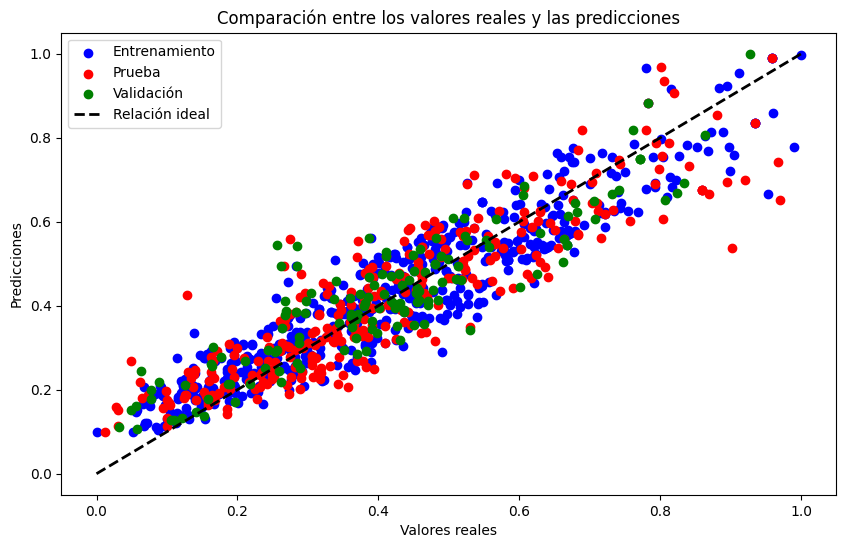

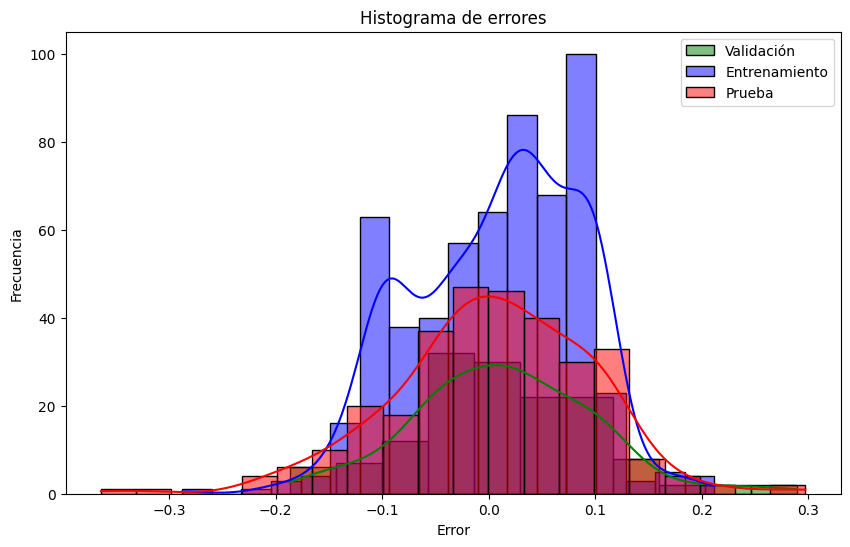

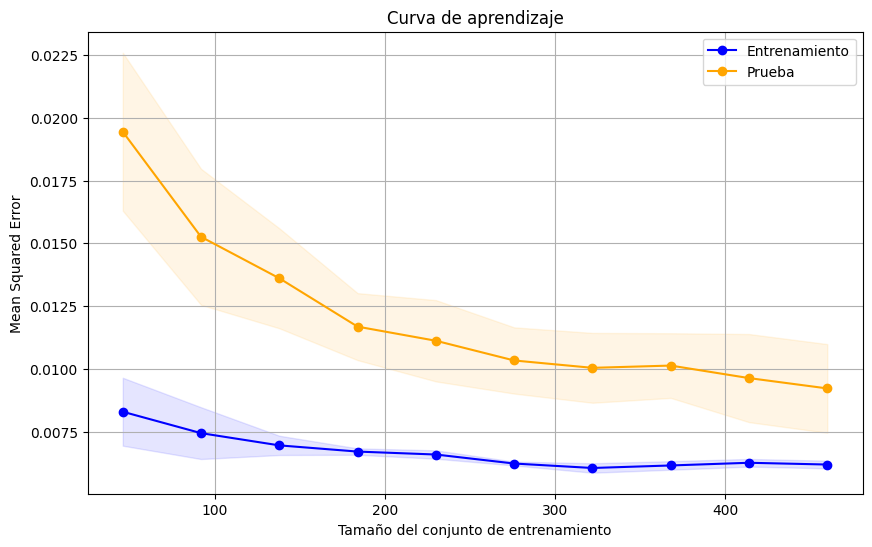

In [11]:
# Crear el modelo
svr = SVR()

# Evaluar el modelo
evaluate_model(svr, X_train, X_test, y_train, y_test, X_val, y_val)

### Desempeño general de los modelos.

El modelo Random Forest muestra el MSE mas bajo tanto en el conjunto de entrenamiento como en el de prueba, lo que sugiere que tiene la mejor capacidad para predecir los valores de salida en comparación con los otros modelos.

Los modelos de Gradient Boosting Regressor tambien muestra buenos resultados, con MSE y R2 cercano a los del modelo de Random Forest.

El modelo de Support Vector Regressor tiene un desempeño ligeramente inferior en comparación con los otros modelos, con un MSE y R2 mas altos tanto en el conjunto de entrenamiento como en el de prueba.

Existe una diferencia relativamente pequeña entre el desempeño en los conjuntos de entrenamiento y prueba para todos los modelos, lo que sugiere que no hay un sobreajuste significativo en ninguno de ellos. 

Sin embargo, el modelo de Random Forest parece generalizar mejor que los otros modelos, ya que mantiene una alta precision tanto en el conjunto de entrenamiento como en el de prueba. 

- El R^2 más alto indica una mejor capacidad de los modelos para explicar la variabilidad de los datos.
- MSE, MAE y MSLE más bajos indican una menor discrepancia entre las predicciones del modelo y los valores reales, lo que implica una mejor precisión.
- MAPE más bajo sugiere una menor proporción de error absoluto en relación con los valores reales, lo que también indica una mejor precisión en las predicciones.

### Validacion Cruzada
Mean Squared Error (MSE):
- En general, el MSE más bajo indica un mejor rendimiento del modelo en términos de la diferencia cuadrática media entre las predicciones y los valores reales.
- El modelo RandomForestRegressor muestra el MSE más bajo, lo que sugiere que tiene la mejor capacidad para minimizar el error cuadrático medio durante la validación cruzada.

Mean Absolute Error (MAE):
- El MAE más bajo indica una menor discrepancia absoluta promedio entre las predicciones y los valores reales.
- Nuevamente, el modelo RandomForestRegressor muestra el MAE más bajo, lo que sugiere una mejor precisión en la predicción de los valores de salida.

Mean Absolute Percentage Error (MAPE):
- El MAPE más bajo indica una menor proporción de error absoluto en relación con los valores reales.
- Aquí también, el modelo RandomForestRegressor muestra el MAPE más bajo, lo que implica una menor discrepancia porcentual promedio entre las predicciones y los valores reales.

Mean Squared Logarithmic Error (MSLE):
- Similar al MSE pero tomando el logaritmo de las predicciones y los valores reales, el MSLE más bajo indica un mejor ajuste logarítmico.
- Una vez más, el modelo RandomForestRegressor muestra el MSLE más bajo, lo que sugiere un mejor ajuste logarítmico durante la validación cruzada.

R^2 Score:
- Un R^2 más alto indica una mejor capacidad del modelo para explicar la variabilidad de los datos.
- En este caso, el modelo GradientBoostingRegressor muestra el R^2 Score más alto durante la validación cruzada, lo que sugiere que explica mejor la variabilidad de los datos en comparación con los otros modelos.